In [1]:
import tensorflow as tf
print(tf.__version__) 

2.2.0


In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = tf.keras.models.load_model('digit_recognizer.h5')

In [3]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 32)       

<class 'numpy.ndarray'>
(170, 170, 3)


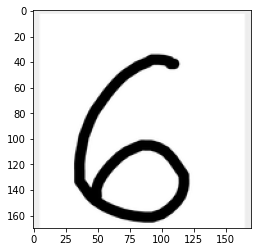

In [6]:
img = cv2.imread("six.png")
print(type(img))
print(img.shape)
plt.imshow(img)

<class 'numpy.ndarray'>
(170, 170)


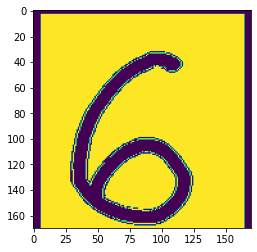

In [7]:
# Get a testing image and preprocess it

def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

img = cv2.imread("six.png")
print(type(img))

imgPred=preProcess(img)
print(imgPred.shape)
plt.imshow(imgPred)

In [8]:
# Resize and reshape image to feed into the model
imgPred=cv2.resize(imgPred,(28,28))
imgPred=imgPred.reshape((1,28,28,1))

In [9]:
# Predict
p=model.predict_classes(imgPred)
print("Predition is : "+str(p[0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predition is : 6


In [12]:
#REAL TIME DIGIT RECOGNITION USING THE WEBCAM
videocapture = cv2.VideoCapture(0)
videocapture.set(3,720)
videocapture.set(4,540)

True

In [13]:
while True:
    ret,image = videocapture.read()
    #perform basic operation to smooth image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    #find threshold
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    #find contours and draw contours
    ctrs, hier = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image,ctrs,-1,(255,255,0),2)
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    for rect in rects:
        x,y,w,h = rect
        if  h > 50 and h < 300  or w > 10 :
            #draw rectangel on image
            cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
            leng = int(rect[3] * 1.6)
            pt1 = abs(int(rect[1] + rect[3] // 2 - leng // 2))
            pt2 = abs(int(rect[0] + rect[2] // 2 - leng // 2))
            roi = img[pt1:pt1+leng, pt2:pt2+leng]
            cv2.imshow('roi',roi)
            roi = cv2.resize(roi,(28, 28), interpolation=cv2.INTER_AREA)
            #resize image
            roi = roi.reshape(-1,28, 28, 1)
            roi = np.array(roi, dtype='float32')
            roi /= 255
            pred_array = model.predict(roi)
            pred_array = np.argmax(pred_array)
            print('Result: {0}'.format(pred_array))
            cv2.putText(image, str(pred_array), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)
    cv2.imshow("Result",image)
    k = cv2.waitKey(27)
    if k == 27:
        break
    
cv2.destroyAllWindows()
videocapture.release()

Result: 5
Result: 7
Result: 0
Result: 1
Result: 1
Result: 2
Result: 8
Result: 1
Result: 8
Result: 0
Result: 7
Result: 2
Result: 2
Result: 2
Result: 8
Result: 2
Result: 2
Result: 7
Result: 1
Result: 8
Result: 7
Result: 6
Result: 8
Result: 0
Result: 7
Result: 8
Result: 0
Result: 7
Result: 1
Result: 7
Result: 1
Result: 8
Result: 7
Result: 7
Result: 7
Result: 5
Result: 8
Result: 0
Result: 9
Result: 0
Result: 8
Result: 1
Result: 2
Result: 4
Result: 7
Result: 7
Result: 0
Result: 8
Result: 7
Result: 1
Result: 1
Result: 4
Result: 2
Result: 5
Result: 7
Result: 0
Result: 9
Result: 8
Result: 2
Result: 3
Result: 4
Result: 8
Result: 5
Result: 5
Result: 1
Result: 7
Result: 4
Result: 2
Result: 3
Result: 4
Result: 4
Result: 7
Result: 7
Result: 0
Result: 7
Result: 7
Result: 2
Result: 8
Result: 3
Result: 4
Result: 2
Result: 2
Result: 1
Result: 7
Result: 7
Result: 4
Result: 7
Result: 1
Result: 4
Result: 3
Result: 2
Result: 1
Result: 2
Result: 5
Result: 7
Result: 1
Result: 7
Result: 7
Result: 1
Result: 4


Result: 3
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 3
Result: 1
Result: 2
Result: 3
Result: 4
Result: 1
Result: 3
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 3
Result: 1
Result: 2
Result: 3
Result: 4
Result: 1
Result: 3
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 1
Result: 1
Result: 2
Result: 3
Result: 4
Result: 8
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 4
Result: 1
Result: 2
Result: 3
Result: 4
Result: 5
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 4
Result: 1
Result: 2
Result: 4
Result: 3
Result: 8
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 2
Result: 1
Result: 2
Result: 4
Result: 3
Result: 8
Result: 5
Result: 8
Result: 7
Result: 6
Result: 5
Result: 8
Result: 8
Result: 1
Result: 1
Result: 2
Result: 4
Result: 9
Result: 7
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 8
Result: 4
Result: 8
Result: 7
Result: 7
Result: 4
Result: 7
Result: 8
Result: 7


Result: 7
Result: 6
Result: 5
Result: 5
Result: 1
Result: 1
Result: 2
Result: 3
Result: 4
Result: 5
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 0
Result: 1
Result: 2
Result: 4
Result: 3
Result: 7
Result: 5
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 0
Result: 1
Result: 2
Result: 4
Result: 3
Result: 5
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 2
Result: 1
Result: 2
Result: 4
Result: 3
Result: 5
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 2
Result: 6
Result: 1
Result: 1
Result: 2
Result: 3
Result: 4
Result: 1
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 6
Result: 1
Result: 2
Result: 3
Result: 4
Result: 7
Result: 1
Result: 7
Result: 8
Result: 6
Result: 5
Result: 5
Result: 6
Result: 1
Result: 2
Result: 3
Result: 4
Result: 1
Result: 7
Result: 1
Result: 7
Result: 6
Result: 8
Result: 5
Result: 3
Result: 6
Result: 1
Result: 2
Result: 3
Result: 4
Result: 4
Result: 1
Result: 7
Result: 8
Result: 6
Result: 5
Result: 6


Result: 5
Result: 7
Result: 8
Result: 2
Result: 1
Result: 2
Result: 3
Result: 4
Result: 8
Result: 7
Result: 0
Result: 6
Result: 5
Result: 7
Result: 8
Result: 2
Result: 1
Result: 2
Result: 3
Result: 4
Result: 8
Result: 7
Result: 0
Result: 6
Result: 5
Result: 7
Result: 8
Result: 2
Result: 1
Result: 2
Result: 3
Result: 4
Result: 8
Result: 7
Result: 0
Result: 6
Result: 5
Result: 7
Result: 8
Result: 2
Result: 1
Result: 2
Result: 3
Result: 4
Result: 8
Result: 7
Result: 7
Result: 0
Result: 8
Result: 7
Result: 6
Result: 5
Result: 1
Result: 1
Result: 2
Result: 3
Result: 4
Result: 5
Result: 7
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 1
Result: 2
Result: 2
Result: 9
Result: 1
Result: 5
Result: 7
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 4
Result: 2
Result: 3
Result: 4
Result: 5
Result: 7
Result: 8
Result: 7
Result: 5
Result: 6
Result: 4
Result: 2
Result: 2
Result: 3
Result: 4
Result: 5
Result: 0
Result: 2
Result: 5
Result: 8
Result: 7
Result: 6
Result: 3
Result: 2


Result: 2
Result: 4
Result: 3
Result: 1
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 8
Result: 2
Result: 6
Result: 1
Result: 2
Result: 3
Result: 4
Result: 1
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 8
Result: 2
Result: 6
Result: 1
Result: 2
Result: 4
Result: 3
Result: 1
Result: 7
Result: 1
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 8
Result: 2
Result: 6
Result: 1
Result: 2
Result: 4
Result: 3
Result: 1
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 8
Result: 2
Result: 6
Result: 1
Result: 2
Result: 4
Result: 3
Result: 1
Result: 7
Result: 8
Result: 7
Result: 6
Result: 5
Result: 5
Result: 8
Result: 2
Result: 1
Result: 2
Result: 4
Result: 3
Result: 6
Result: 7
